# DP

## 518. Coin Change 2

Medium

You are given coins of different denominations and a total amount of money. Write a function to compute the number of combinations that make up that amount. You may assume that you have infinite number of each kind of coin.

Example 1:

    Input: amount = 5, coins = [1, 2, 5]
    Output: 4
    Explanation: there are four ways to make up the amount:
    5=5
    5=2+2+1
    5=2+1+1+1
    5=1+1+1+1+1

Note:

You can assume that

    0 <= amount <= 5000
    1 <= coin <= 5000
    the number of coins is less than 500
    the answer is guaranteed to fit into signed 32-bit integer

In [31]:
# 兩項分別是用那顆新加進來的銅板或不用

coins = (1, 2, 5)
amount = 5

def coinChange(coins, amount):
    dp = [[1 for _ in range(amount+1)] for _ in range(len(coins)+1)]
    dp[0] = [1] + [0]*amount
    
    for i in range(1, len(coins)+1):
        for j in range(1, amount+1):
            if j >= coins[i-1]:
                dp[i][j] = dp[i][j-coins[i-1]] + dp[i-1][j]
            else: 
                dp[i][j] = dp[i-1][j]
    
    return dp[-1][-1]
    
coinChange(coins, amount)

4

In [34]:
# LeetCode 上 84% 答案，寫成一維陣列可以省下照抄上面的時間

coins = (1, 2, 5)
amount = 5

def change(amount, coins):
    dp = [0] * (amount + 1)
    dp[0] = 1
    for c in coins:
        for i in range(c, amount + 1):
                dp[i] += dp[i-c]
    return dp[-1]

change(amount, coins)

4

## 322. Coin Change

Medium

You are given coins of different denominations and a total amount of money amount. Write a function to compute the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

You may assume that you have an infinite number of each kind of coin.

 

Example 1:

    Input: coins = [1,2,5], amount = 11
    Output: 3
    Explanation: 11 = 5 + 5 + 1


In [11]:
from functools import lru_cache

coins = (1, 2, 5)
amount = 11

@lru_cache(maxsize=None)
def coinChange(coins, amount):  # without memoizing, this recursive solution is too slow like fibonacci
    if amount < 0:
        return -1
    elif amount==0:
        return 0
    else:
        sc = [coinChange(coins, amount-coin) for coin in coins]

        if all( val==-1 for val in sc):
            return -1
        else: 
            return 1 + min(val for val in sc if val!=-1)
    
coinChange(coins, amount)

3

In [27]:
# 其實大部份 table DP 都可以用一維陣列寫，只有遇到要用到上兩層的資訊的情況下不行

import math

coins = (1, 2, 5)
amount = 11

def coinChange(coins, amount):
    dp = [[0 for _ in range(amount+1)] for _ in range(len(coins)+1)]
    dp[0] = [0] + [math.inf]*amount
    
    for i in range(1, len(coins)+1):
        for j in range(1, amount+1):
            if j >= coins[i-1]:
                dp[i][j] = min(dp[i][j-coins[i-1]]+1, dp[i-1][j])
            else: 
                dp[i][j] = dp[i-1][j]
    
    return dp[-1][-1] if dp[-1][-1] != math.inf else -1
    
coinChange(coins, amount)

3

In [25]:
# LeetCode 上 75% 的答案

coins = (1, 2, 5)
amount = 11

def coinChange(coins, amount):
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0

    for coin in coins:
        for x in range(coin, amount + 1):
            dp[x] = min(dp[x], dp[x - coin] + 1)
        
    return dp[amount] if dp[amount] != float('inf') else -1 

coinChange(coins, amount)

3

## 198. House Robber

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security system connected and it will automatically contact the police if two adjacent houses were broken into on the same night. Given a list of non-negative integers representing the amount of money of each house, determine the maximum amount of money you can rob tonight without alerting the police.

上面冗長的題目就只是在說不能連續偷兩家。

在前面最佳策略已知的情況下，決定要不要偷最後一家：
$$
f([2, 7, 9, 3, 1]) = \max( 1 + f([2, 7, 9]),  f([2, 7, 9, 3]))
$$

In [1]:
nums = [2, 7, 9, 3, 1]

def rob(nums):
    if len(nums) == 0:      return 0
    elif len(nums) == 1:    return nums[0]
    else:
        nums[1] = max(nums[:2])
        for i in range(2, len(nums)):
            nums[i] = max(nums[i] + nums[i-2], nums[i-1])

        return nums[-1]
    
rob(nums)


12

## 72. Edit Distance

Hard

Given two strings word1 and word2, return the minimum number of operations required to convert word1 to word2.

You have the following three operations permitted on a word:

    Insert a character
    Delete a character
    Replace a character

Example 1:

    Input: word1 = "horse", word2 = "ros"
    Output: 3
    Explanation: 
    horse -> rorse (replace 'h' with 'r')
    rorse -> rose (remove 'r')
    rose -> ros (remove 'e')


In [14]:
word1 = 'horse'
word2 = 'ros'

def minDistance(word1, word2):
    m = len(word2) + 1
    n = len(word1) + 1
    a = [[0 for _ in range(n)] for _ in range(m)]
    
    for j in range(n):
        a[0][j] = j 
        
    for i in range(m):
        a[i][0] = i
    
    for i in range(1, m):
        for j in range(1, n):
            a[i][j] = min(a[i-1][j-1] + (word1[j-1]!=word2[i-1]), a[i-1][j]+1, a[i][j-1]+1)
    
    return a[-1][-1]
    
minDistance(word1, word2)

3

## 84. Largest Rectangle in Histogram

Hard

Given n non-negative integers representing the histogram's bar height where the width of each bar is 1, find the area of largest rectangle in the histogram.

 
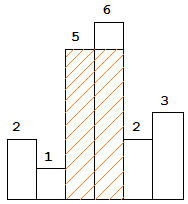
 

Example:

    Input: [2,1,5,6,2,3]
    Output: 10

以下答案有錯！

In [ ]:
# heights = [2, 1, 5, 6, 2, 3]
heights = [1, 2, 3, 4, 5]

def largestRectangleArea(heights):
    if len(heights) == 0:
        return 0
    
    # 一定要用到最後一根 bin 的最大矩形的面積和 (高, 寬)
    # 遇到多個面積相同的情況就記多個 (高, 寬) 組
    
    res = area = heights[0]
    hws = [(heights[0], 1)]
    for n in heights[1:]:
        hws = [(n, 1)] + [(min(h, n), w+1) for h, w in hws]
        area = max(h*w for h, w in hws)
        hws = [(h, w) for h, w in hws if h*w==area]
        res = max(res, area)
    
    return res    

largestRectangleArea(heights)